# Study time of subject vs. of prerequisites: which one has a greater impact on exam performance?
## Introduction
The modeling of relative knowledge levels for students within different domains is essential for web-based adaptive learning services. Adaptive learning is a system where teaching is built around the student, adjusting itself based on the needs of students to provide an efficient learning experience. This is done through the use of AI, the AI uses different variables to decide the knowledge level of the student and helps them determine their most efficient learning schedule. This poses the question, **can we use the degree of study time of both the goal object and its prerequisites to predict whether a student will score an A on a goal object exam?** To answer this question, we will be utilizing the “User Knowledge Modeling” dataset created by Hamdi Tolga Kahraman et al. **(DESCRIBE DATASET)**
## Preliminary exploratory data analysis

In [1]:
# Install libraries shown
library(tidyverse)
library(repr)
library(rvest)
library(readxl)
library(RColorBrewer)
options(repr.matrix.max.rows = 6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘rvest’ was built under R version 4.0.2”
Loading required package: xml2


Attaching package: ‘rvest’


The following object is masked from ‘package:purrr’:

    pluck


The following object is masked from ‘package:readr’:

    guess_encoding




#### *Reading in file*

In [2]:
url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/00257/Data_User_Modeling_Dataset_Hamdi%20Tolga%20KAHRAMAN.xls"
path <- "user_knowledge.xls"
download.file(url, destfile = path)

user_knowledge_training <- read_excel(path, range = "Training_Data!A1:F259") # training data
user_knowledge_test <- read_excel(path, range = "Test_Data!A1:F146") # testing data

head(user_knowledge_training, 6)
head(user_knowledge_test, 6)

STG,SCG,STR,LPR,PEG,UNS
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
0.00,0.00,0.00,0.00,0.00,very_low
0.08,0.08,0.10,0.24,0.90,High
0.06,0.06,0.05,0.25,0.33,Low
0.10,0.10,0.15,0.65,0.30,Middle
0.08,0.08,0.08,0.98,0.24,Low
0.09,0.15,0.40,0.10,0.66,Middle


STG,SCG,STR,LPR,PEG,UNS
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
0.00,0.10,0.50,0.26,0.05,Very Low
0.05,0.05,0.55,0.60,0.14,Low
0.08,0.18,0.63,0.60,0.85,High
0.20,0.20,0.68,0.67,0.85,High
0.22,0.22,0.90,0.30,0.90,High
0.14,0.14,0.70,0.50,0.30,Low


Remarks: The data is already tidy.

#### *Wrangling data*

In [3]:
user_knowledge_training_raw <- user_knowledge_training # backup

user_knowledge_training$LG <- user_knowledge_training$PEG %>% # converts variable for exam performance on goal object (PEG) to letter grade (LG)
    cut(breaks = c(0,0.5,0.55,0.6,0.64,0.68,0.72,0.76,0.8,0.85,0.9,1),
       right = FALSE) %>% 
    recode("[0,0.5)" = "F",
            "[0.5,0.55)" = "D",
          "[0.55,0.6)" = "C-",
          "[0.6,0.64)" = "C",
          "[0.64,0.68)" = "C+",
          "[0.68,0.72)" = "B-",
          "[0.72,0.76)" = "B",
          "[0.76,0.8)" = "B+",
          "[0.8,0.85)" = "A-",
          "[0.85,0.9)" = "A",
          "[0.9,1)" = "A+")

user_knowledge_training <- select(user_knowledge_training, STG, STR, LG) # only keeping variables to be used

user_knowledge_training
user_knowledge_training_raw

# user_knowledge_classification_mutation <- user_knowledge %>%
#     arrange(PEG, desc()) %>%
#     mutate(PEGA1 = ifelse(PEG %in% c(0.90,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1), "A+", NA)) %>%
#     mutate(PEGA2 = ifelse(PEG %in% c(0.85,0.86,0.87,0.88,0.89), "A", NA)) %>%
#     mutate(PEGA3 = ifelse(PEG %in% c(0.84,0.83,0.82,0.81,0.80), "A-", NA)) %>%
#     mutate(PEGB1 = ifelse(PEG %in% c(0.79,0.78,0.77,0.76), "B+", NA)) %>%
#     mutate(PEGB2 = ifelse(PEG %in% c(0.75,0.74,0.73,0.72), "B", NA)) %>%
#     mutate(PEGB3 = ifelse(PEG %in% c(0.71,0.70,0.69,0.68), "B-", NA)) %>%
#     mutate(PEGC1 = ifelse(PEG %in% c(0.67,0.66,0.65,0.64), "C+", NA)) %>%
#     mutate(PEGC2 = ifelse(PEG %in% c(0.63,0.62,0.61,0.6), "C", NA)) %>%
#     mutate(PEGC3 = ifelse(PEG %in% c(0.59,0.58,0.57,0.56,0.55), "C-", NA)) %>%
#     mutate(PEGD = ifelse(PEG %in% c(0.54,0.53,0.52,0.51), "D", NA)) %>%
#     mutate(PEGF = ifelse(PEG %in% c(0,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.2,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.3,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,0.39,0.4,0.41,0.42,0.43,0.44,0.45,0.46,0.47,0.48,0.49), "F", NA)) %>%
#     mutate(PEG = coalesce(PEGA1, PEGA2, PEGA3, PEGB1, PEGB2, PEGB3, PEGC1, PEGC3, PEGD, PEGF)) %>%
#     select(STG, STR, PEG) %>%
#     mutate(PEG = as_factor(PEG))


# user_knowledge_classification_mutation
# user_knowledge

STG,STR,LG
<dbl>,<dbl>,<fct>
0.00,0.00,F
0.08,0.10,A+
0.06,0.05,F
⋮,⋮,⋮
0.54,0.71,B+
0.50,0.81,F
0.66,0.76,B


STG,SCG,STR,LPR,PEG,UNS
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
0.00,0.00,0.00,0.00,0.00,very_low
0.08,0.08,0.10,0.24,0.90,High
0.06,0.06,0.05,0.25,0.33,Low
⋮,⋮,⋮,⋮,⋮,⋮
0.54,0.82,0.71,0.29,0.77,High
0.50,0.75,0.81,0.61,0.26,Middle
0.66,0.90,0.76,0.87,0.74,High


#### *Summary tables*

In [4]:
summary_table <- tibble("observations" = nrow(user_knowledge_training), "number of NA values" = sum(is.na(user_knowledge_training)))

var_desc <- tibble(variable = c("STG", "STR", "LG"),
                   description = c("The degree of study time for goal object materials (Electrical DC Machines)",
                                   "The degree of study time of user for prerequisites to goal object",
                                   "The letter grade corresponding to the exam performance of user for goal object"))

# var_desc_raw <- tibble(variable = c("STG", "SCG", "STR", "LPR", "PEG", "UNS"), # BACKUP
#                    description = c("The degree of study time for goal object materials (Electrical DC Machines)",
#                                    "The degree of repetition number of user for goal object materials",
#                                    "The degree of study time of user for prerequisites to goal object",
#                                    "The exam performance of user for prerequisites to goal object",
#                                    "The exam performance of user for goal objects",
#                                    "Knowledge level/learning status of user"))

summary(user_knowledge_training, maxsum = 11)

var_desc

summary_table

      STG              STR          LG     
 Min.   :0.0000   Min.   :0.0000   F :128  
 1st Qu.:0.2407   1st Qu.:0.2913   D : 16  
 Median :0.3270   Median :0.4900   C-: 22  
 Mean   :0.3711   Mean   :0.4680   C : 12  
 3rd Qu.:0.4950   3rd Qu.:0.6900   C+: 27  
 Max.   :0.9900   Max.   :0.9500   B-:  6  
                                   B :  3  
                                   B+: 13  
                                   A-: 13  
                                   A : 11  
                                   A+:  7  

variable,description
<chr>,<chr>
STG,The degree of study time for goal object materials (Electrical DC Machines)
STR,The degree of study time of user for prerequisites to goal object
LG,The letter grade corresponding to the exam performance of user for goal object


observations,number of NA values
<int>,<int>
258,0


#### *Visualization*

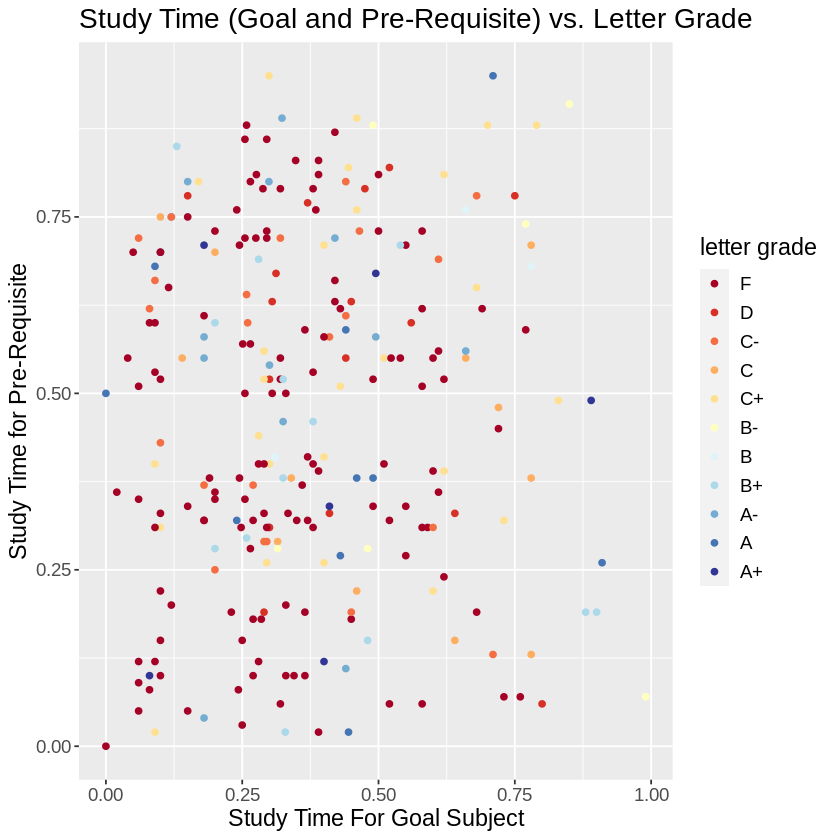

In [5]:
user_knowledge_plot_goal <- ggplot(user_knowledge_training, aes(x = STG, y = STR)) +
    geom_point(aes(color = LG)) +
    labs(x = "Study Time For Goal Subject", y = "Study Time for Pre-Requisite", colour = "letter grade", title = "Study Time (Goal and Pre-Requisite) vs. Letter Grade") +
    theme(text = element_text(size = 14))

user_knowledge_plot_goal <- user_knowledge_plot_goal +
    scale_color_brewer(palette = "RdYlBu")

user_knowledge_plot_goal

This scatter diagram shows the goal study time in x-axis and prerequisite study time in y-axis. The grade for each single record was distinguished by the color that had a description on the right side. 


## Methods
The K-nearest neighbor classification algorithm will be used to predict the letter grade of the student. First, the numerical variable of exam performance for goal objects (PEG) will be mutated to a categorical variable of letter grades (LG) based on the UBC Vancouver Academic Calendar for 2022/23. Next, the classification model will be trained based on the variables of degree of study time on the goal object (STG) and degree of study time on prerequisites (STR), and letter grades. Finally, the letter grade of observations in the testing data will be predicted based on the variables STG and STR. The data will be visualized on a scatterplot with STG on the x-axis and STR on the y-axis, with each letter grade shown as a different color. All numerical values are standardized.


## Expected Outcomes and Significance
Based on the data that we have analyzed so far and our past experiences, we expect that the study time for pre-requisite subjects and the study time for the goal subject to be accurate predictors as to whether a student will score an A in their goal subject exams. If our findings are correct, then we can expect our findings to impact how students prioritize their study time and organize their schedules. Our findings could also influence how much emphasis students place on studying pre-requisite subjects or goal subjects. Based on our current study, future data analysts could utilize our findings and calculate the accuracy of predictions based on our predictor variables. Future data analysts could also analyze how other predictor variables could predict if a student achieves a letter grade of A, or how predictor variables predict letter grades other than A’s. 


## Bibliography
(cite source for definition of adaptive learning, UBCV letter grades)